In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns


start = '2018-09-01'
end = '2021-09-01'

In [2]:
# There are 2 tables on the Wikipedia page
# we want the first table

payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
tickers = first_table.Symbol.to_list()

In [3]:
df = yf.download(tickers, start, end)

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


In [4]:
df = df.Close

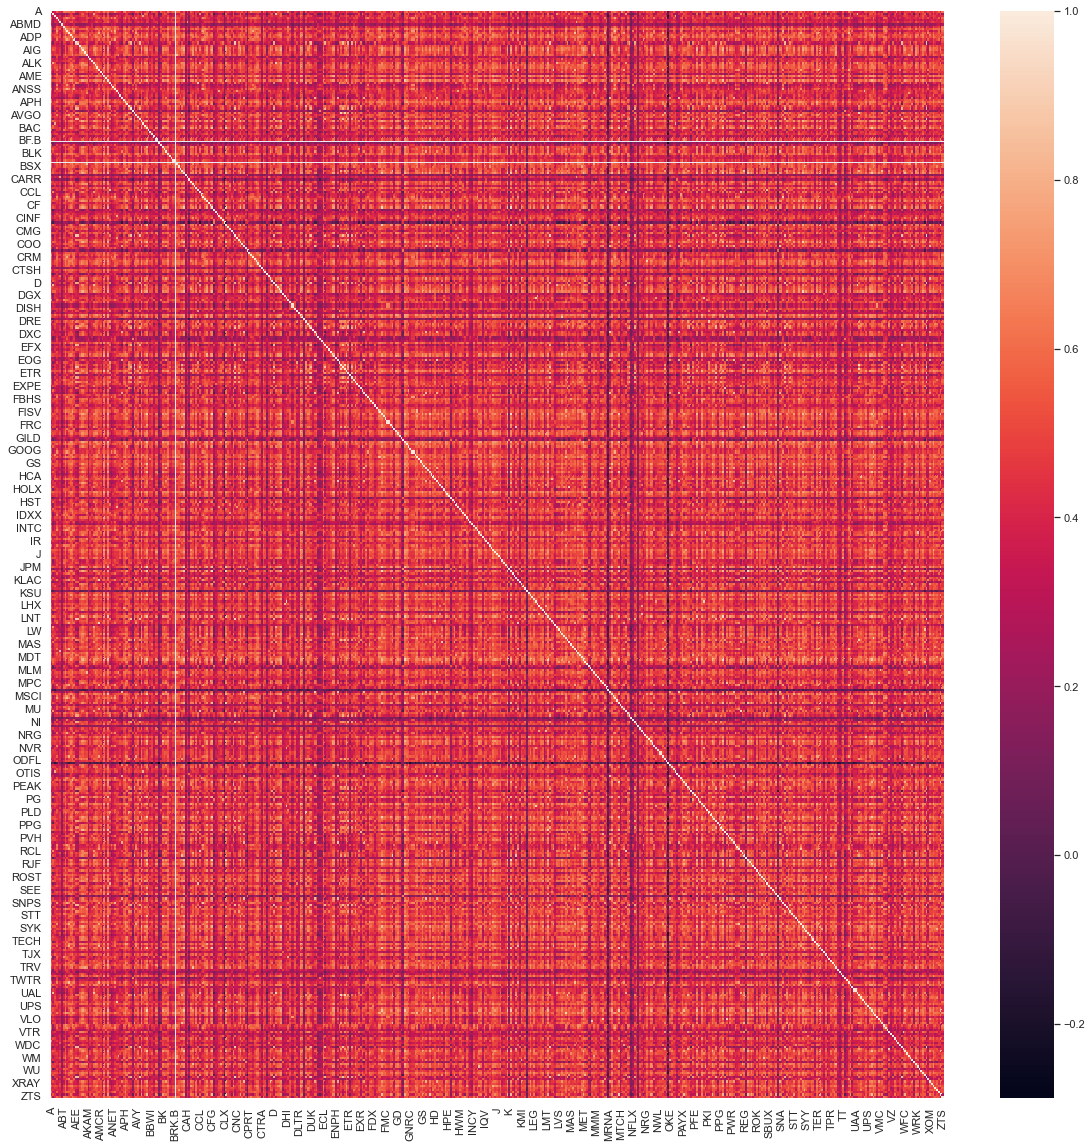

In [5]:
log_returns_corr = np.log(df/df.shift(1)).corr().round(4)


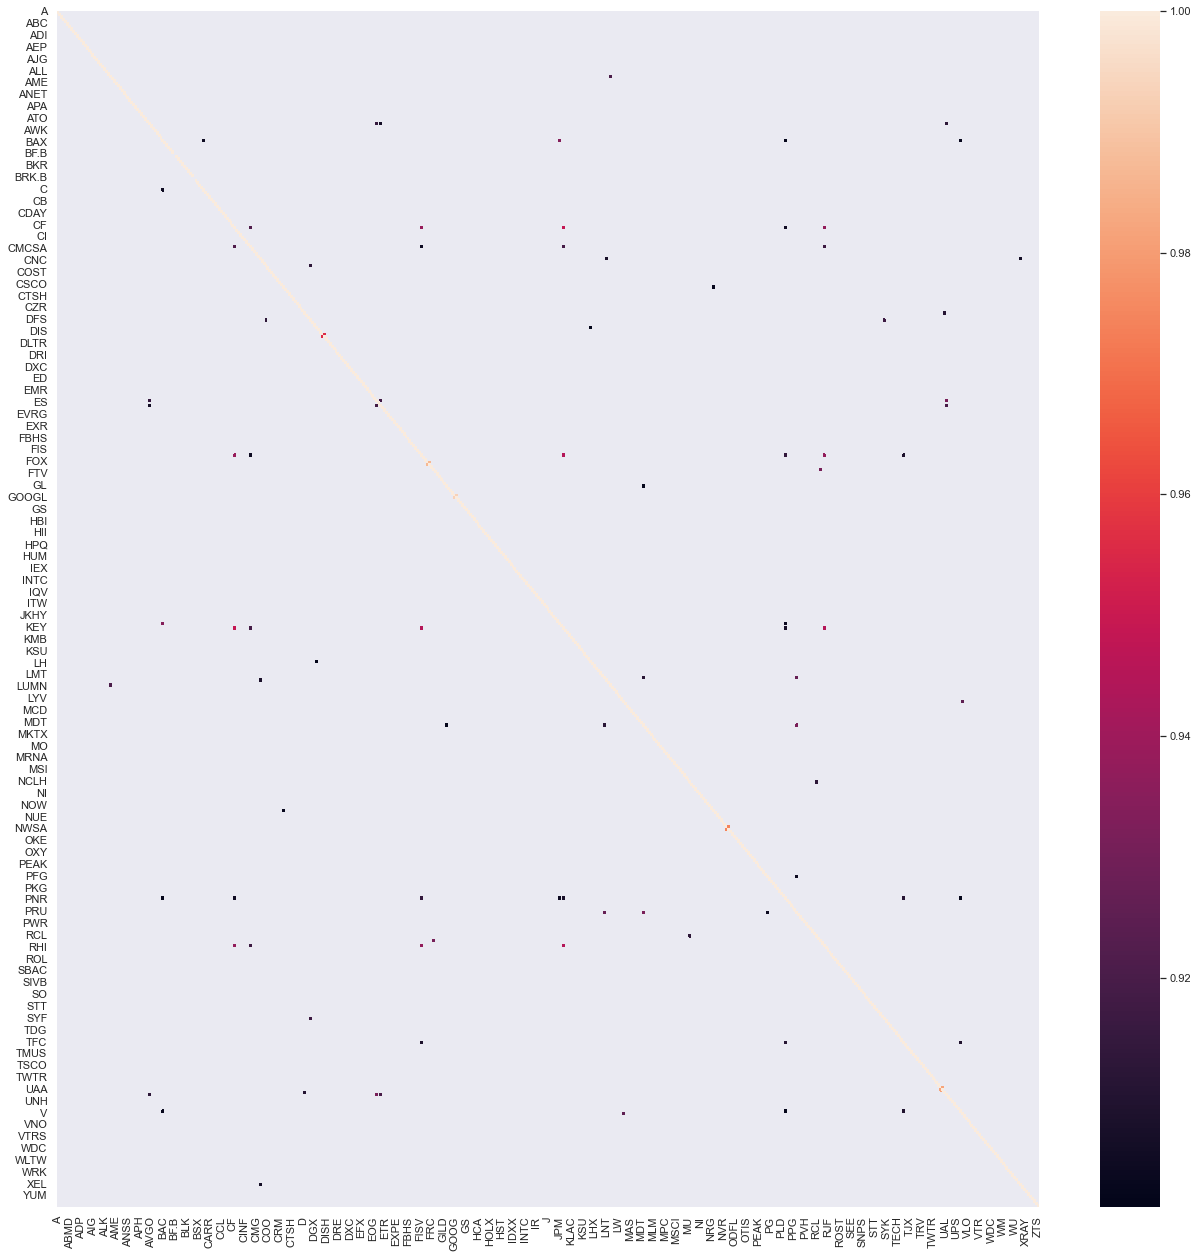

In [15]:
# We're creating heatmap to see does any stocks have strong correlation and then we select the pair
correlated = log_returns_corr[(log_returns_corr > 0.9) | (log_returns_corr < -0.9)]
sns.set(rc = {'figure.figsize':(22,22)})
sns.heatmap(correlated)

In [ ]:
# Then the following step is to backtest 